In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [29]:
spam = pd.read_csv('spam_ham_dataset.csv')

In [30]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   num        5171 non-null   int64 
 1   label      5171 non-null   object
 2   text       5171 non-null   object
 3   label_num  5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [31]:
spam.describe()

,num,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [32]:
spam.head()

,num,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [36]:
spam.columns

Index(['num', 'label', 'text', 'label_num'], dtype='object')

In [37]:
spam.isnull().sum()
#no null data

num          0
label        0
text         0
label_num    0
dtype: int64

In [38]:
spam.nunique()

num          5171
label           2
text         4993
label_num       2
dtype: int64

In [39]:
spam.duplicated().sum()
#no duplicate

0

In [33]:
spam.groupby('label').describe()

num                                                                 \
        count    mean          std     min      25%     50%      75%     max   
label                                                                          
ham    3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25  3671.0   
spam   1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50  5170.0   

      label_num                                     
          count mean  std  min  25%  50%  75%  max  
label                                               
ham      3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
spam     1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [34]:
spam.drop('num',axis=1)

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(spam.text,spam.label,test_size=0.3)

In [62]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
from sklearn.pipeline import Pipeline
model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [65]:
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [67]:
X_train.shape

(3619,)

In [68]:
X_test.shape

(1552,)

In [69]:
y_train.shape

(3619,)

In [71]:
y_test.shape

(1552,)

In [72]:
spam.shape

(5171, 4)

In [86]:
emails=[
    'How are You?',
    'ur car is ready'
]

In [87]:
model.predict(emails)

array(['ham', 'spam'], dtype='<U4')

In [75]:
model.score(X_test,y_test)

0.9787371134020618

In [90]:
#print the predictions
print(model.predict(X_test))
#print the actual values
print(y_test.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [95]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1114
        spam       0.96      0.96      0.96       438

    accuracy                           0.98      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.98      0.98      1552



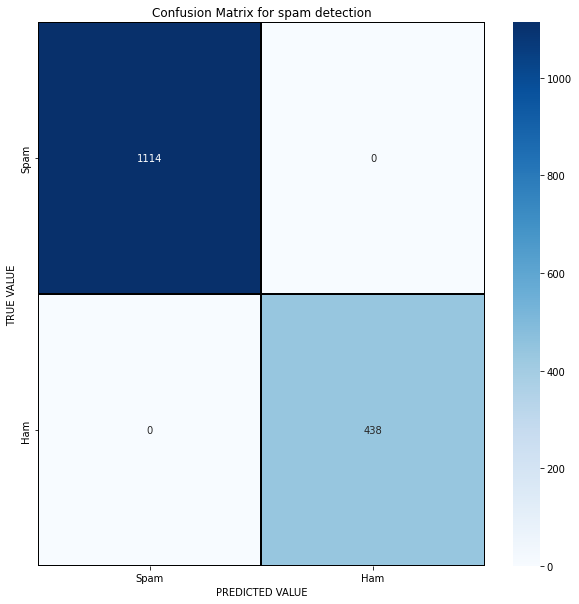

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, y_test)

x_axis_labels = ["Spam", "Ham"]
y_axis_labels = ["Spam","Ham"]

f,ax=plt.subplots(figsize =(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black",  fmt = ".0f", ax=ax,cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUE")
plt.ylabel("TRUE VALUE")
plt.title('Confusion Matrix for spam detection')
plt.show()